In [5]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import time

j=1j #pratique

plt.rcParams['figure.figsize'] = [14, 14] #Redimensionne l'affichage

def suite(zn,C):
    
    """
    Calcule le terme suivant d'une suite récurrente
    """
    
    return(zn**2+C)


def estDivergente(C, rang_max, Zzero=0):
    
    """
    La fonction indique si la suite issue du nombre complexe C est divergente (i.e. C n'appartient pas à l'ensemble que l'on calcule)
    'C' est le nombre complexe dont est issue la suite (i.e le complexe dont on veut savoir s'il appartient à l'ensemble)
    'rang_max' est le rang maximal pour lequel on détermine si la suite est bornée. Si |z|<2 à rang_max, on considère que la suite est bornée. 
    'Zzero' est un argument OPTIONNEL pour changer le 1er terme de la suite. Si rien n'est spécifié, Zzero=0.
    """
    
    z=Zzero
    for k in range(rang_max):
        z=suite(z,C)
        if np.abs(z)>2:
            return(True,k)
    return(False,0) # la suite n'est A PRIORI pas divergente
    

def couleur(rang_de_divergence, rang_max, mode_de_colorisation):
    
    """
    renvoie un triplet associée à une couleur suivant le type de la variable mode_de_colorisation.
    'rang_de_divergence' est le rang renvoyé par la fonction 'estDivergente()'
    rang_max est nécessaire car on veut savoir ou se situe rang_de_divergence entre 0 et rang_max
    mode_de_colorisation = 'lineaire', 'noir_et_blanc' ou 'log'
    """
    
    rang_de_divergence_normalise = rang_de_divergence * 2 / rang_max # désormais 0 < rang_de_divergence_normalise < 2 
    
    if mode_de_colorisation=="log":
        rang_de_divergence_normalise=math.sqrt(rang_de_divergence_normalise)*math.sqrt(2) #pourquoi calculer une racine carrée, alors que l'échelle de couleur est une échelle dite "logarithmique" ? Car la fonction puissance et le logarithme sont étroitements liés ; on a a^x=exp(x ln(a))
    elif mode_de_colorisation=="noir_et_blanc":
        return(1,1,1)
    
    #En python, au lieu d'utiliser la notation standard des couleurs (triplet d'entier entre 0 et 255, on peut utiliser un triplet de flottants compris entre 0 et 1, comme ici
    
    if rang_de_divergence_normalise<=1: 
        couleur_pixel=(0.0, rang_de_divergence_normalise, 1-rang_de_divergence_normalise) #renvoie une nuance de Vert et Bleu
    else:
        couleur_pixel=(rang_de_divergence_normalise-1,2-rang_de_divergence_normalise,0.0) #renvoie une nuance de Rouge et Vert
    
    return(couleur_pixel)

def afficheEtEnregistre(matrice, xmin, xmax, ymin, ymax, nom_de_fichier) :
    
    """
    permet d'afficher la matrice et de l'enregistrer sous le nom nom_de_fichier
    xmin, xmax, ymin, ymax sont des REELS correspondant aux limites des axes sur lesquels l'image correspondant à la matrice est affichée.
    nom_de_fichier doit être suivi de .png
    A noter, l'enregistrement d'images ne fonctionne pas en ligne, il faudrait copier coller ce programme dans un éditeur python sur votre ordinateur...
    """
    
    plt.imshow(matrice, extent = ([xmin, xmax, ymin, ymax]))
    plt.savefig(nom_de_fichier)
    plt.show()



def main(xmin=-2, xmax=0.5, ymin=-1.1, ymax=1.1, rang_max=100,  nb_points_ligne=100, nom_fichier="test", mode_de_colorisation="log", type_ensemble="mandelbrot", argument_julia=0.2+0.6j):
    
    """
    xmin, xmax, ymin, ymax = définit le rectangle du plan complexe dans lequel on fait les calculs
    'rang_max' est le rang maximal pour lequel on détermine si la suite est bornée. Si |z|<2 à rang_max, on considère que la suite est bornée. 
    nb_points_ligne = nombre de points calculés par ligne (qualité de l'image). Le nombre de ligne est calculé automatiquement à partir des autres arguments.
    mode_de_colorisation = 'log' 'linear'ou 'noir_et_blanc'
    type_ensemble = choisit le type d'ensemble que l'on veut calculer ('mandelbrot' ou 'julia')
    argument_julia = argument nécessaire que si on veut calculer l'ensemble de julia (c'est la constante C)
    TOUS LES ARGUMENTS SONT OPTIONNELS (ils ont une valeur par défaut)
    """
    
    plt.close() #Ferme les images précédentes si il y en avait
    pas=(xmax-xmin)/nb_points_ligne #pas entre 2 points calculés du plan complexe
    nb_lignes=int((ymax-ymin)/pas) #de cette manière, les pixels sont carrés


    print('nombre de points en abcisse : '+ str(nb_points_ligne))
    print('nombre de points en ordonnée : '+ str(nb_lignes))


    matriceCouleur=np.zeros([nb_lignes,nb_points_ligne,3], dtype=float)#on crée une matrice qui contient des triplets de flottants
    for x in range(nb_points_ligne):
        for y in range(nb_lignes):#double boucle pour parcourir le plan complexe
            xc=xmin+pas*x #coordonees du point que l'on teste actuellement
            yc=ymin+pas*y #coordonees du point que l'on teste actuellement
            
            if type_ensemble=="mandelbrot":
                divergente, rang_de_divergence = estDivergente(xc+yc*j, rang_max)
            elif type_ensemble=="julia":
                divergente, rang_de_divergence = estDivergente(argument_julia, rang_max, xc+yc*j)
                
            else :
                print("type_ensemble invalide ! Seuls 'julia' et 'mandelbrot' sont acceptes")
                return()
            
            #Colorisation
            
            if divergente==False:
                matriceCouleur[y,x]=(0.,0.,0.)
                #les points qui appartiennent à l'ensemble sont coloriés en noir
            elif divergente==True:
                matriceCouleur[y,x] = couleur(rang_de_divergence, rang_max, mode_de_colorisation)
                
    afficheEtEnregistre(matriceCouleur, xmin, xmax, ymin, ymax, nom_fichier)
    return()

nombre de points en abcisse : 200
nombre de points en ordonnée : 176


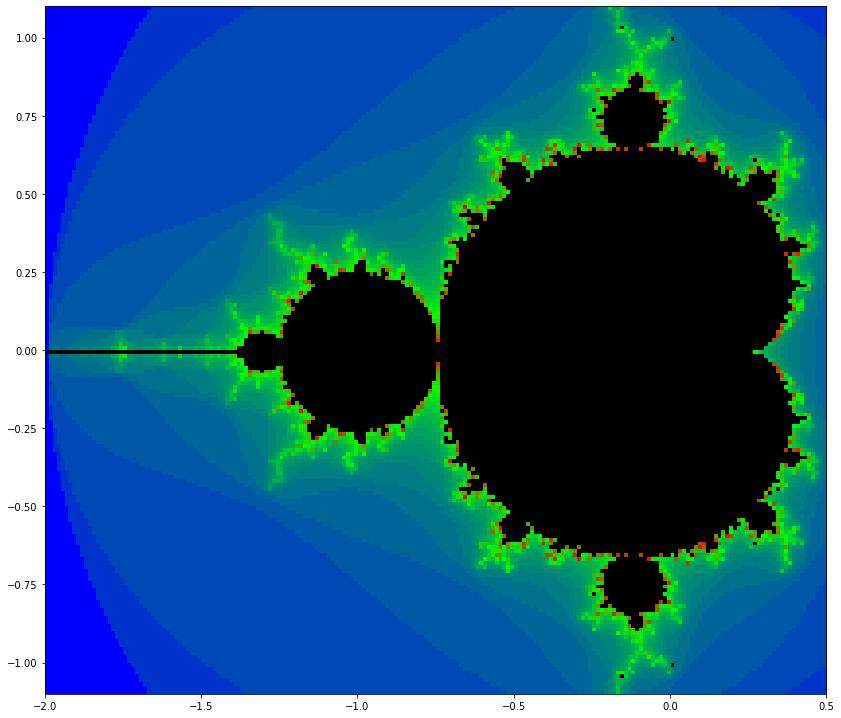

()

In [7]:
main(nb_points_ligne=200)